In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [88]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df.value_counts().sum()

42000

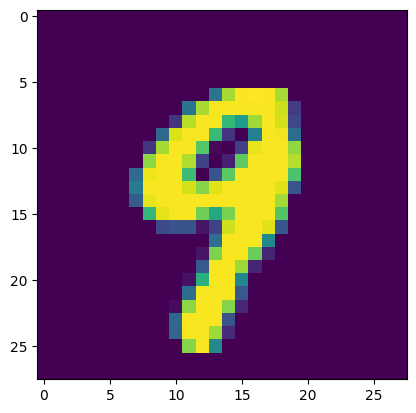

In [90]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[4197,1:].values.reshape(28,28))

In [91]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
X_train.shape

(33600, 784)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
y_pred=knn.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [99]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [100]:
from sklearn.decomposition import PCA
pca =PCA(n_components=200)


In [101]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [102]:
X_train_trf.shape

(33600, 200)

In [103]:
knn1=KNeighborsClassifier()

In [106]:
knn1.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [107]:
y_pred = knn1.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.669404761904762

In [110]:
for i in range(1,785,5):
    pca=PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf=pca.fit_transform(X_test)
    knn1=KNeighborsClassifier()
    knn1.fit(X_train_trf,y_train)
    y_pred = knn1.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

0.2532142857142857
0.8182142857142857
0.7716666666666666
0.7617857142857143
0.7636904761904761
0.7203571428571428
0.7029761904761904
0.7228571428571429
0.7071428571428572
0.695595238095238
0.6892857142857143
0.6894047619047619
0.6903571428571429
0.6984523809523809
0.6854761904761905
0.6919047619047619
0.6748809523809524
0.6883333333333334
0.6765476190476191
0.6864285714285714
0.6707142857142857


KeyboardInterrupt: 

In [111]:
pca = PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [ ]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [113]:
X_train_trf

array([[-2.71862368, -0.49025561],
       [-0.6770179 , -6.75371467],
       [-3.03321612,  6.51021728],
       ...,
       [ 2.14879341,  0.78157335],
       [ 1.05956675,  0.94746728],
       [17.70258677,  1.96115723]])

In [114]:
pca = PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [115]:
X_train_trf

array([[-2.71863123, -0.48966073,  1.13599741],
       [-0.67697457, -6.75388189, -2.33719094],
       [-3.0332267 ,  6.50969615,  7.49152591],
       ...,
       [ 2.14880566,  0.78061807, -0.74821414],
       [ 1.0595659 ,  0.94796521,  3.9507054 ],
       [17.70259742,  1.96197309, -4.94277103]])

In [130]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(
margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [120]:
pca.explained_variance_
#eigen_value

array([40.87278367, 28.96628012, 27.04280026])

In [121]:
pca.components_.shape

(3, 784)

In [124]:
print(f"{(pca.explained_variance_ratio_)*100}%")

[6.05450635 4.29078989 4.00586383]%


In [125]:
pca = PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [126]:
pca.explained_variance_.shape

(784,)

In [127]:
pca.components_.shape

(784, 784)

In [128]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

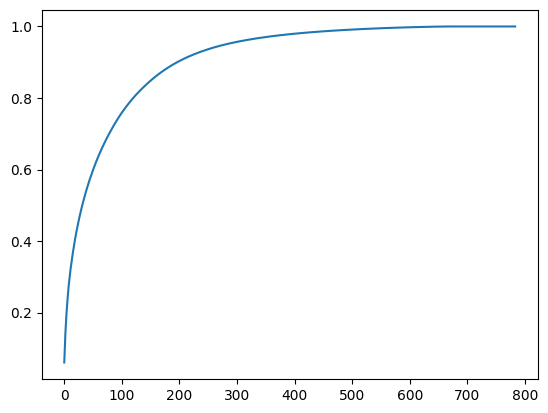

In [129]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# somewhere around n_component = (200 to 300) in 90% range